# Tutorial 02 - Trace rays

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pestoseis.ttimerays as tr

## 1. Problem Setup
The objective of this exrcise is to trace a series of rays across a few different input velocity models.
First, we start off by importing our data:

In [2]:
i = 3 #1 2 3 4

Changing the value of `i` will change the input dataset.

In [3]:
filename = f'inputdata/exe2_input_velmod_{i}.npy'
print(filename)

inputdata/exe2_input_velmod_3.npy


In [4]:
inpdat=np.load(filename,allow_pickle=True).item()
gridpar=inpdat['gridpar']
sources=inpdat['srcs']
receivers=inpdat['recs']
velmod=inpdat['velmod']

## 2. Compute the Traveltimes
Similar to in the previous exercise, we want to compute the traveltimes for the different source-receiver positions.

In [5]:
ttpick,ttime = tr.traveltime(velmod, gridpar, sources, receivers)

Calculating traveltime for source 8 of 8 


## 3. Trace the Rays<br>
<br>
Now that we have the traveltimes we can trace the rays to see the ray paths throughout the domain.

In [6]:
rays = tr.traceallrays(gridpar, sources, receivers, ttime)

tracing rays for source 8 of 8     


## 4. Plot the Results
We can not plot the following results:<br>
- The traveltimes for each receiver receiver position<br>
- The ray paths travelled through the domain

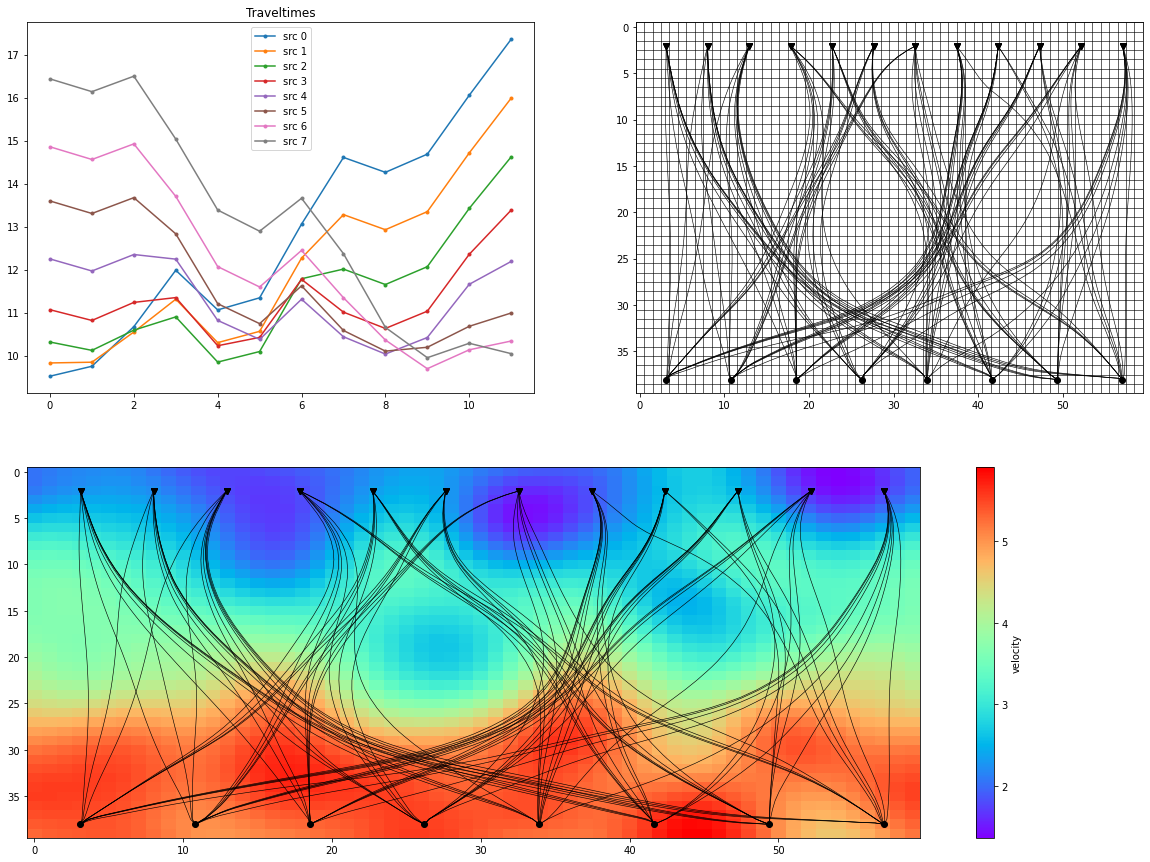

In [7]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2)
plt.subplot(gs[0, 0]) 
plt.title('Traveltimes')
for i in range(ttpick.size):
    plt.plot(ttpick[i][:],'.-',label='src {}'.format(i))
plt.legend()

plt.subplot(gs[0,1]) 
tr.plotrays(sources,receivers,rays)
tr.plotgrid(gridpar)
#plotttimemod(gridpar,ttime[0])
#extent_ttime = [gridpar['xttmin'],gridpar['xttmax'],
#                gridpar['yttmin'],gridpar['yttmax'] ]
#plt.contour(ttime[0].T,50,extent=extent_ttime,colors='black',linewidth=0.5)

plt.subplot(gs[1,:]) 
tr.plotvelmod(gridpar,velmod)
tr.plotrays(sources,receivers,rays)

plt.show()

 Try to re-run the notebook with different value of `i`, i.e., with a different input data set.